# Cambio de variable u
## integral 1: con f(u)
### derivada a: derivada central

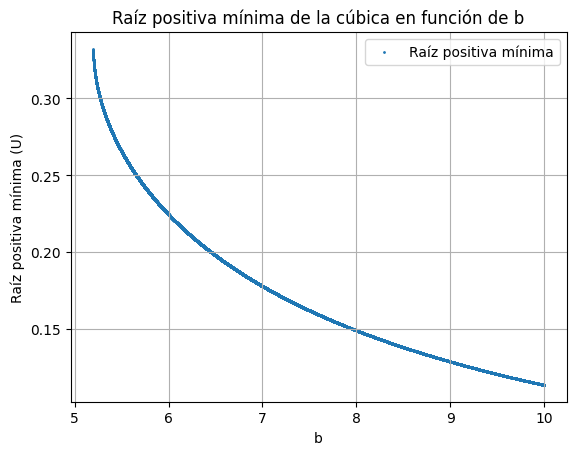

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los coeficientes de la cúbica
def coeficientes_cubica(b, m):
    # Ecuación: -2*m*b^2*u^3 + b^2*u^2 + 0*u - 1 = 0
    return [-2 * m * b**2, b**2, 0, -1]

# Parámetros
m = 1
inicio = 3 * (3**(1/2)) * m
fin = 10 * m
paso = 0.0001
valores_b = np.arange(inicio, fin, paso)


# Lista para almacenar las raíces positivas más pequeñas
valores_U_minima = []

#Para cada valor de se resuelve ecuacion cubica para u
for b in valores_b:
    coefs = coeficientes_cubica(b, m)
    # Encontrar todas las raíces (reales y complejas)
    raices = np.roots(coefs)
    # Filtrar raíces reales positivas
    raices_reales_positivas = raices[np.isreal(raices) & (raices.real > 0)].real
    # Seleccionar la raíz positiva más pequeña si existe
    if len(raices_reales_positivas) > 0:
        raiz_minima = min(raices_reales_positivas)
        valores_U_minima.append(raiz_minima)
    else:
        # Si no hay raíces positivas, agregar NaN
        valores_U_minima.append(np.nan)

# Graficar los resultados
valores_U_minima = np.array(valores_U_minima)
plt.scatter(valores_b, valores_U_minima, label="Raíz positiva mínima", s=1)
plt.xlabel("b")
plt.ylabel("Raíz positiva mínima (U)")
plt.title("Raíz positiva mínima de la cúbica en función de b")
plt.legend()
plt.grid()
plt.show()


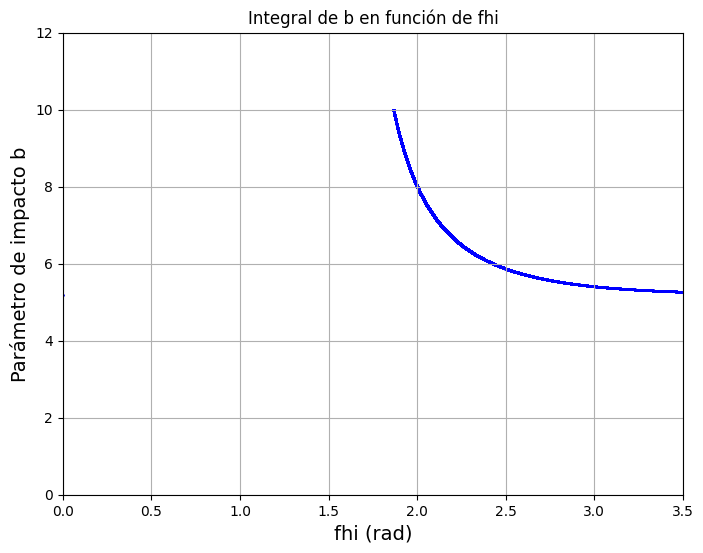

In [2]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt


def f(u, m):
    return 1-2*m*u
    
# Este es el integrando
def integrando(u, b, m):
    fu = f(u,m)
    un = 1 / (b**2) - (u**2) * fu
    #para evitar que salgan imaginarios en la raiz
    if un <= 0:
        return 0
    return 1 / np.sqrt(un)

# Función para calcular la integral
def fhi_b_corrected(b, u_m, m):
    try:
        # Realizar la integración
        integral_result, _ = quad(integrando, 0, u_m, args=(b, m))
        return integral_result
    except Exception as e:
        print(f"Error durante la integración para b={b}: {e}")
        return np.nan  # Devuelve NaN si hay un error

# Parámetros
m = 1

#para cada valor de u critica y su b manda a llamar fhi_b_corrected osea calcula la integral
fhi_values = [fhi_b_corrected(b, valores_U_minima[i], m) for i, b in enumerate(valores_b)]

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(fhi_values,valores_b, color='blue', s=1)
plt.ylabel("Parámetro de impacto b", fontsize=14)
plt.xlabel("fhi (rad)", fontsize=14)
plt.grid(True)
plt.xlim(0, 3.5)
plt.ylim(0, 12)  # Ajustar el límite superior del eje y para una mejor visualización
plt.title("Integral de b en función de fhi")
plt.show()


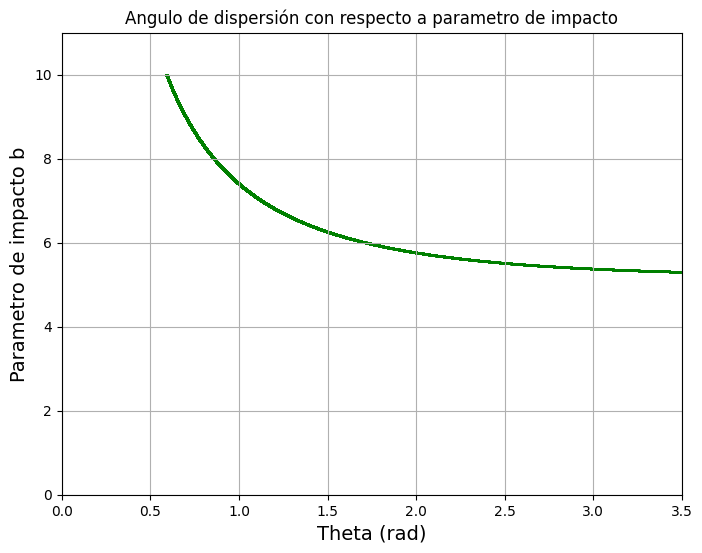

In [3]:
#CALCULO DE THETA=2phi-pi
theta_values = 2 * np.array(fhi_values) - np.pi

plt.figure(figsize=(8, 6))
plt.scatter(theta_values, valores_b, color='green', s=1)
plt.ylabel("Parametro de impacto b", fontsize=14)
plt.xlabel("Theta (rad)", fontsize=14)
plt.grid(True)
plt.xlim(0, 3.5)
plt.ylim(0, 11)
plt.title("Angulo de dispersión con respecto a parametro de impacto")
plt.show()


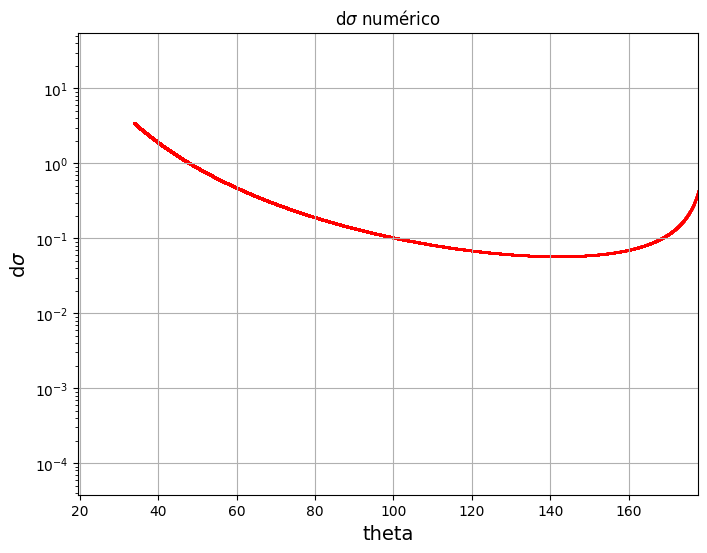

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Convertir theta_values de radianes a grados
theta_values = np.degrees(theta_values)

# np.diff() calcula diferencia entre valores consecutivos de b y theta respectivamente
db_dtheta_values = np.abs(np.diff(valores_b) / np.diff(theta_values))

# Array vacío para almacenar los sigmas
sigma_theta = []

# Para i de 1 hasta la longitud del array de theta_values
for i in range(1, len(theta_values)):
    # Para que no se indetermine
    if np.sin(np.radians(theta_values[i])) != 0:  # Convertir de nuevo a radianes para el cálculo
        # Cálculo de sigma(theta)
        sigma_value = (valores_b[i] / np.sin(np.radians(theta_values[i]))) * db_dtheta_values[i - 1]
        # Se guarda el valor en el array
        sigma_theta.append(sigma_value)
    else:
        sigma_theta.append(0)

# Graficar sigma(theta) en función de theta
plt.figure(figsize=(8, 6))
plt.scatter(theta_values[1:], sigma_theta, color='r', s=1)  # Empezamos en 1 para alinear con db_dtheta_values
plt.yscale('log')
plt.xlabel("theta", fontsize=14)
plt.ylabel("d$\sigma$ ", fontsize=14)
plt.grid(True)
plt.xlim(0.34* 180/np.pi, 3.10 * 180/np.pi)  # Ajustar el límite del eje x para grados (0, 3.5 radianes ≈ 200 grados)
plt.title("d$\sigma$ numérico")
plt.show()